## Data Preparation
##### Using the Support Vector Machine (SVM) algorithm to solve the problem of basic waste sorting at home
In this classification article, I use data on 4 different types of waste: 'Hazardous waste', 'Organic waste', 'Other waste', and 'Recyclable waste'. You can get the data and code from my personal github.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
from sklearn.model_selection import train_test_split
import os # quản lí hệ điều hành và tệp tin

In [ ]:
dataDir = 'DATA_clean'
def statistic(dataDir):
    label = []
    num_images = []
    for lab in os.listdir(dataDir):
        label.append(lab)
        files=os.listdir(os.path.join(dataDir, lab))
        c=len(files)
        num_images.append(c)
    return label, num_images
labels, num_images = statistic(dataDir)
print(labels)
print(num_images)


['Hazardous waste', 'Organic waste', 'Other waste', 'Recyclable waste']
[1011, 997, 941, 16874]


## Visualization data
Tập dữ liệu mà tôi sử dụng gồm 4 class, số lượng samples của mỗi class là khác nhau.

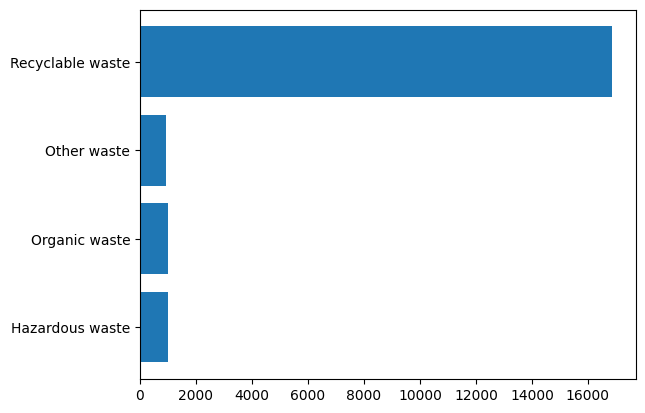

In [3]:
y_pos = np.arange(len(labels))
plt.barh(y_pos, num_images, align='center')
plt.yticks(y_pos, labels)
plt.show()

## Split into train and test sets

After the data statistics process, I will divide the data into 2 sets of Train and Test according to the familiar ratio of 80% for the train and 20% for the test. To divide the data into 2 sets, I define the following function:

In [56]:
output_dir = 'DATA_split'
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')

for class_name in os.listdir(dataDir):
    class_path  = os.path.join(dataDir, class_name) 
    if  os.path.isdir(class_path): 
        files = [os.path.join(class_path, f) for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))] 

        train_files, test_files = train_test_split(files, test_size=0.2, random_state=42)

        train_class_dir = os.path.join(train_dir, class_name)
        test_class_dir = os.path.join(test_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)

        for file in train_files:
            shutil.copy(file, train_class_dir)
        for file in test_files:
            shutil.copy(file, test_class_dir)
print('Data split done!')


Data split done!
